# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

### Data Acquisition

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [2]:
amazon_uk = pd.read_csv("Amazon_uk_price_prediction.csv")

Scraped dataset from Amazon UK, with price prediction in focus.

The dataset includes various data points, such as the number of reviews, rating, best seller status, and items sold last month.

### Exploratory Data Analysis (EDA)

In [3]:
amazon_uk

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
amazon_uk.shape

(2443651, 9)

In [5]:
amazon_uk.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [6]:
amazon_uk.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [7]:
# Retrieving the unique data types present in the dataframe columns
list(set(amazon_uk.dtypes.tolist()))

[dtype('bool'), dtype('O'), dtype('int64'), dtype('float64')]

In [8]:
# Extracting column names with numerical data types from the dataframe
amazon_uk.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [9]:
# Counting and sorting the unique values for each numerical column in descending order
amazon_uk.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [10]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = amazon_uk.select_dtypes("number").loc[:, amazon_uk.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [11]:
# Retrieving column names with object (typically string) data types from the dataframe
amazon_uk.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [12]:
# Counting and sorting the unique values for each object (string) column in descending order
amazon_uk.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [13]:
# Retrieving column names with boolean (True or False variable) data types from the dataframe
amazon_uk.select_dtypes("boolean").columns

Index(['isBestSeller'], dtype='object')

In [14]:
# Counting and sorting the unique values for each object (string) column in descending order
amazon_uk.select_dtypes("boolean").nunique()

isBestSeller    2
dtype: int64

In [15]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
amazon_categorical = pd.concat([amazon_uk.select_dtypes("object"), amazon_uk.select_dtypes("boolean")], axis=1)
# Extracting columns with number (typically float and integer data types to create a numerical dataframe
amazon_numerical = amazon_uk.select_dtypes("number")

In [16]:
# Verifying that the total number of columns in the dataframe is the sum of object (string), plus boolean and numerical columns.
len(amazon_uk.columns) == len(amazon_uk.select_dtypes("object").columns) + len(amazon_uk.select_dtypes("boolean").columns) + len(amazon_uk.select_dtypes("number").columns)

True

### Data Cleaning

#### Missing Values

In [17]:
# Checking for missing data
amazon_uk.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

## Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### 1. **Frequency Tables**:

    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [18]:
# Frequency table for 'category'
frequency_table = amazon_uk['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = amazon_uk['category'].value_counts(normalize=True)

frequency_table.head(n=5), proportion_table.head(n=5)

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
 Name: proportion, dtype: float64)

_**Top 5** most listed product categories:_
- Sports & Outdoors
- Beauty
- Handmade Clothing, Shoes & Accessories
- Bath & Body
- Birthday Gifts

### 2. **Visualizations**:

    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [19]:
# Distribuition of products across different categories (top 10)
amazon_top_10_freq = frequency_table.head(n=10)
amazon_top_10_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

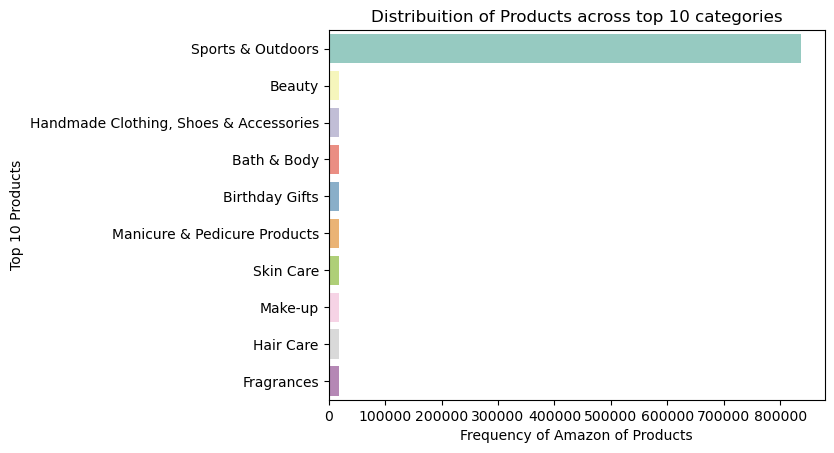

In [20]:
# Display the distribution of products across different categories using a bar chart
sns.barplot(x=amazon_top_10_freq.values, y=amazon_top_10_freq.index, hue=amazon_top_10_freq.index, palette="Set3", legend=False) # type: ignore
plt.xlabel('Frequency of Amazon of Products')
plt.ylabel('Top 10 Products')
plt.title('Distribuition of Products across top 10 categories')
plt.show()

**Insights** from the Bar Charts:

- The bar charts confirm the dominance of the 'Sports & Outdoors' category within the dataset.

- The bar representing the 'Sports & Outdoors' category is significantly taller than the others, emphasizing its much higher frequency.

- Specifically, the 'Sports & Outdoors' category has a frequency of 836,265 items. In comparison, the second highest category, 'Beauty', has 19,312 items, and the third highest, 'Handmade Clothing, Shoes & Accessories', has 19,229 items. 

In [21]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
amazon_top_10_prop = proportion_table.head(n=10)
amazon_top_10_prop

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Manicure & Pedicure Products              0.007751
Skin Care                                 0.007681
Make-up                                   0.007675
Hair Care                                 0.007667
Fragrances                                0.007597
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

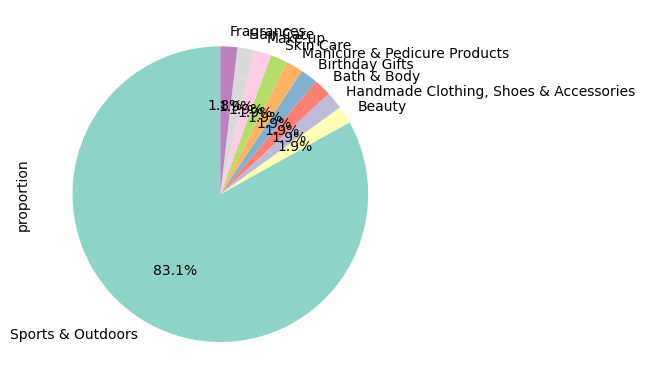

In [22]:
# Plotting a pie chart for subset of top categories, visualize, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
amazon_top_10_prop.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

**Insights** from Pie Charts:

- The pie chart clearly illustrates the dominance of the 'Sports & Outdoors' category, which represents a significant portion of the chart (83.1%).

- The slices for the top 2 through top 10 categories are much smaller, highlighting the skewed distribution.

- While pie charts effectively show proportions, the overwhelming dominance of 'Sports & Outdoors' makes it challenging to discern differences between the smaller categories. This emphasizes the utility of alternative visualizations, such as bar charts, which can provide more detailed insights for such distributions.

## Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. **Measures of Centrality**:

    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [23]:
# From Summary Statistics for the dataset, calling the measures requested
amazon_uk.describe().loc[['mean', '50%']]

,uid,stars,reviews,price,boughtInLastMonth
mean,1.370545e+06,2.152836,480.627757,89.243809,25.896988
50%,1.349029e+06,0.000000,0.000000,19.090000,0.000000


In [24]:
# Using the mode function 
mode(amazon_uk['price'].mode())

9.99

In [50]:
# Calculating individual statistical measures for `price`
print(f"Individual Statistical Measure for 'price':")
print(f" The average (mean) price is £{amazon_uk['price'].mean()}")
print(f" The middle (median) price is £{amazon_uk['price'].median()}")
print(f" The price that appears the most (mode) is {amazon_uk['price'].mode()}")

Individual Statistical Measure for 'price':
 The average (mean) price is £89.24380943923663
 The middle (median) price is £19.09
 The price that appears the most (mode) is 0    9.99
Name: price, dtype: float64


**Insights** from Summary Statistics for 'price':

- The average (mean) price for Amazon UK products in the dataset is approximately £89.24.

- The median sale price (middle value when sorted) is £19.09. This value is significantly lower than the mean, indicating that the distribution of sale prices is skewed towards higher values.

- The mode price (the most common price) is £9.99.

### 2. **Measures of Dispersion**:

    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [27]:
# Summary statistics for the dataset
amazon_uk.describe().loc[['std', '25%', '75%', 'min', 'max']]

,uid,stars,reviews,price,boughtInLastMonth
std,8.160562e+05,2.194865,5.944124e+03,345.608862,240.483727
25%,6.589215e+05,0.000000,0.000000e+00,9.990000,0.000000
75%,2.060686e+06,4.400000,5.900000e+01,45.990000,0.000000
min,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
max,2.828593e+06,5.000000,1.356658e+06,100000.000000,50000.000000


In [28]:
# Calculating individual statistical measures for `price`
print(f"Individual Statistical Measure for 'price':")
print(f" The standard deviation (std) in price is £{amazon_uk['price'].std()}")
print(f" The range price is £{(amazon_uk['price'].max()) - (amazon_uk['price'].min())}")
print(f" The price variance is £{amazon_uk['price'].var()}")

Individual Statistical Measure for 'price':
 The standard deviation (std) in price is £345.60886175352226
 The range price is £100000.0
 The price variance is £119445.48532256528


**Insights** from Summary Statistics for 'price':

- The standard deviation, which measures the amount of variation or dispersion in the sale prices, is approximately £345.60. This indicates that sale prices can vary significantly from the average.
- The minimum and maximum sale prices are £0 and £100,000, respectively, highlighting a wide range of product values in the dataset.
- The interquartile range (IQR), represented by the values at the 25th percentile (Q1) and the 75th percentile (Q3), spans from £9.99 to £45.99. This means that 50% of the items in the Amazon UK dataset were sold within this price range.

### 3. **Visualizations**:

    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

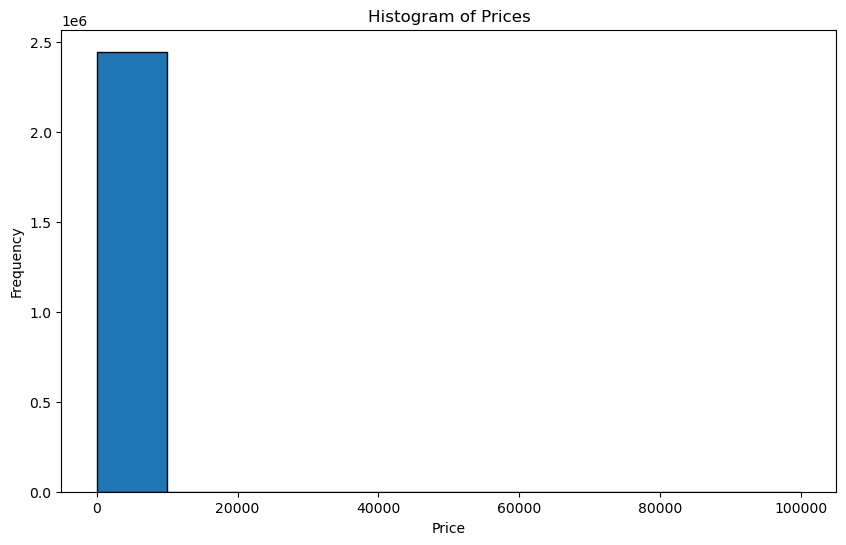

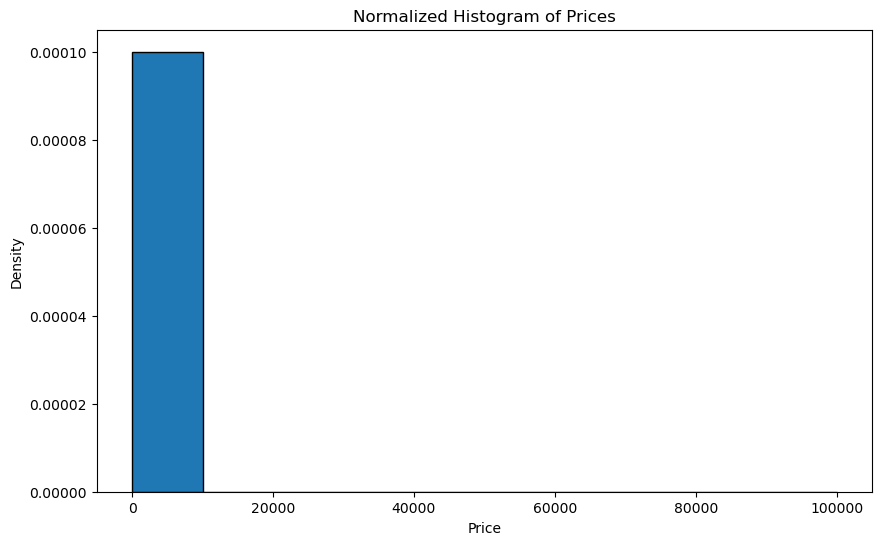

In [58]:
# Regular Histogram
plt.figure(figsize=(10, 6))
plt.hist(amazon_uk['price'], bins=10, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

# Normalized Histogram
plt.figure(figsize=(10, 6))
plt.hist(amazon_uk['price'], bins=10, edgecolor='k', density=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Normalized Histogram of Prices')
plt.show()

<Axes: ylabel='price'>

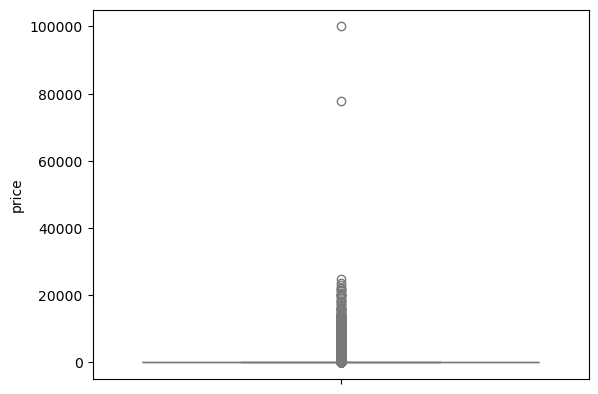

In [60]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(data = amazon_uk['price'], color="lightblue")

 **Insights** from 'price' Visualizations:

- The price distribution is heavily concentrated for items valued between £0 and £10,000. As a result, the histogram does not effectively reflect the distribution for products priced outside this range.

#### Filtering the max outliers

In [46]:
# Finding outliers: Define whiskers

Q1_price = amazon_uk['price'].describe().loc['25%']
print(f"The Q1 (25%) for 'price' is £{Q1_price}")

Q3_price = amazon_uk['price'].describe().loc['75%']
print(f"The Q3 (75%) for 'price' is £{Q3_price}")

# IQR = Q3 - Q1
IQR_price = Q3_price - Q1_price
print(f"The IQR for 'price' is £{IQR_price}")

# Q1 - (1.5 * IQR)
min_outlier_price = Q1_price - (1.5 * IQR_price)
# Q3 + 1.5 * IQR
max_outlier_price = Q3_price + (1.5 * IQR_price)
print(f"The standard prices are from £{min_outlier_price} and {max_outlier_price}")

The Q1 (25%) for 'price' is £9.99
The Q3 (75%) for 'price' is £45.99
The IQR for 'price' is £36.0
The standard prices are from £-44.01 and 99.99000000000001


In [55]:
# Taking out the outliers from the plot to visualise in a better way the price distribuition
standard_prices = amazon_uk[amazon_uk['price'] < max_outlier_price]['price']
standard_prices

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2115963, dtype: float64

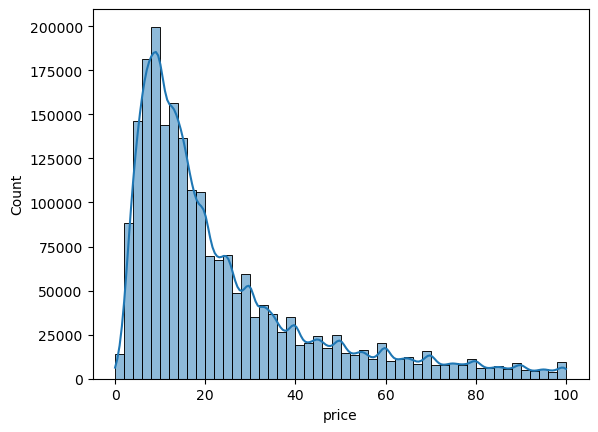

In [59]:
# Create a histogram of price values from the Amazon dataset
sns.histplot(x=standard_prices, bins=50, kde=True);

<Axes: ylabel='price'>

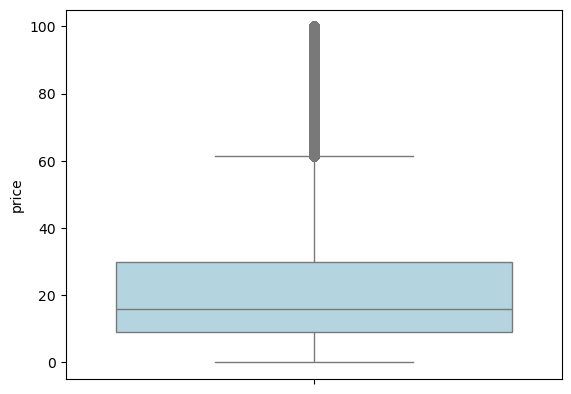

In [61]:
# Plotting a boxplot for the 'standard_prices' with a light blue color
sns.boxplot(data =standard_prices, color="lightblue")

 **Insights** from 'price' Visualizations:

- After filtering out the maximum prices (which are much larger than most values in the dataset), the histogram reveals that the majority of items are sold in the price range of approximately £2 to £20. However, there is a long tail on the right side, confirming our earlier inference from the skewness value that there are items sold at much higher prices. The Kernel Density Estimate (the smooth line) also shows the right-skewed nature of the distribution.

- The box plot provides a visual representation of the central 50% of the data (the interquartile range), with the median price shown as a line inside the box. The whiskers extend to 1.5 times the interquartile range, and points outside this range are considered outliers. There are several outlier points on the higher end of the sale prices, which aligns with our earlier insights about items sold at significantly higher prices.

Both visualizations underscore the presence of outliers in the higher price range. These outliers might be luxury items or tech devices, and special attention might be needed when building predictive models, as these outliers can significantly influence model performance.

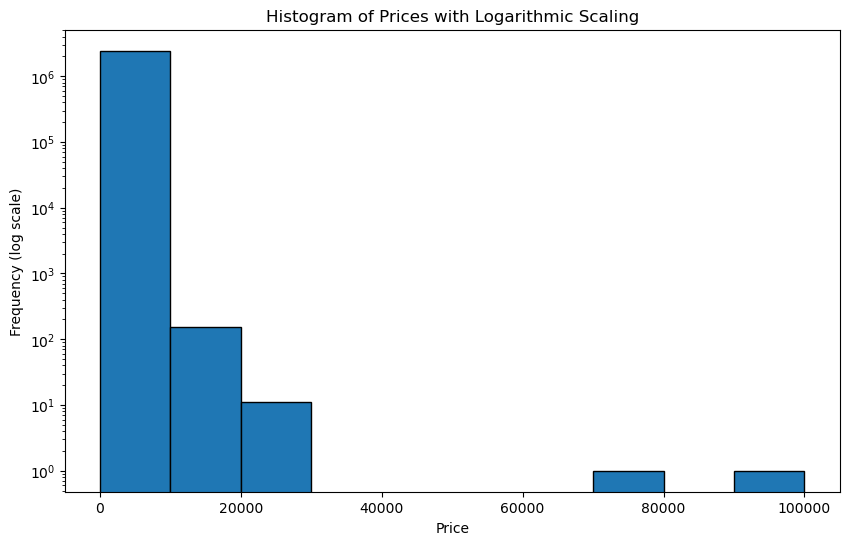

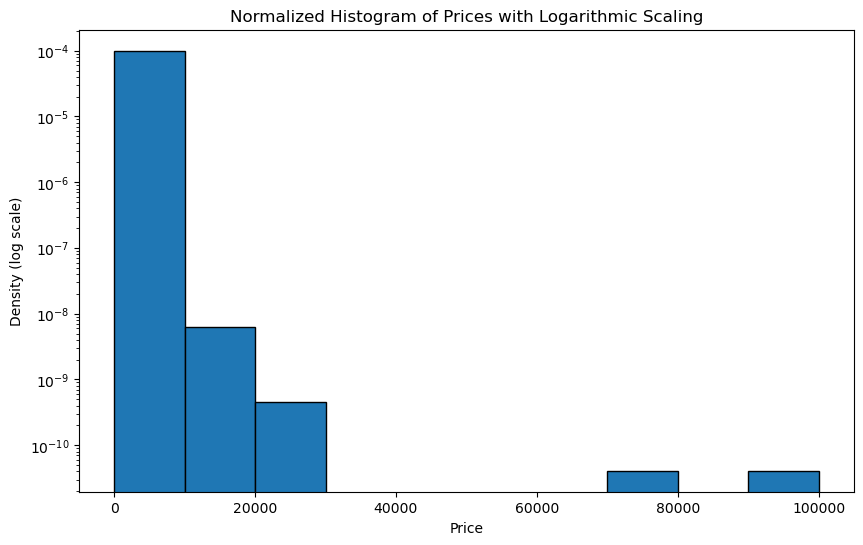

In [57]:
# Alternatively using the logarithmic scaling

# Histogram with Logarithmic Scaling
plt.figure(figsize=(10, 6))
plt.hist(amazon_uk['price'], bins=10, edgecolor='k', log=True)
plt.xlabel('Price')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Prices with Logarithmic Scaling')
plt.show()

# Combined: Normalized Histogram with Logarithmic Scaling
plt.figure(figsize=(10, 6))
plt.hist(amazon_uk['price'], bins=10, edgecolor='k', density=True, log=True)
plt.xlabel('Price')
plt.ylabel('Density (log scale)')
plt.title('Normalized Histogram of Prices with Logarithmic Scaling')
plt.show()


Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

## Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1. **Measures of Centrality**:

    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [35]:
# From Summary Statistics for the dataset, calling the measures requested
amazon_uk.describe().loc[['mean', '50%']]

,uid,stars,reviews,price,boughtInLastMonth
mean,1.370545e+06,2.152836,480.627757,89.243809,25.896988
50%,1.349029e+06,0.000000,0.000000,19.090000,0.000000


In [36]:
# Using the mode function 
mode(amazon_uk['stars'].mode())

0.0

In [37]:
# Calculating individual statistical measures for `stars`
print(f"Individual Statistical Measure for 'stars':")
print(f" The average (mean) stars is {amazon_uk['stars'].mean()}")
print(f" The middle (median) stars is {amazon_uk['stars'].median()}")
print(f" The stars that appears the most (mode) is {amazon_uk['stars'].mode()}")

Individual Statistical Measure for 'stars':
 The average (mean) stars is 2.152836472966065
 The middle (median) stars is 0.0
 The stars that appears the most (mode) is 0    0.0
Name: stars, dtype: float64


**Insights** from Summary Statistics for 'stars':

- The average (mean) rating for Amazon UK products in the dataset is approximately 2.15. This value is influenced by both high and low ratings, including the zeros.

- The median rating (the middle value when sorted) is 0. This suggests that there are many zero ratings, which could indicate an issue with the data or reflect the actual distribution of ratings.

- The mode (the most frequently occurring value) is 0.

- Customers generally rate products on Amazon UK with 0 stars. There appears to be a pattern of rating products either 0 stars or close to 2 stars, with a strong tendency towards negative scores.

### 2. **Measures of Dispersion**:

    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [38]:
# Summary statistics for the dataset
amazon_uk.describe().loc[['std', '25%', '75%', 'min', 'max']]

,uid,stars,reviews,price,boughtInLastMonth
std,8.160562e+05,2.194865,5.944124e+03,345.608862,240.483727
25%,6.589215e+05,0.000000,0.000000e+00,9.990000,0.000000
75%,2.060686e+06,4.400000,5.900000e+01,45.990000,0.000000
min,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
max,2.828593e+06,5.000000,1.356658e+06,100000.000000,50000.000000


In [39]:
# Calculating individual statistical measures for `price`
print(f"Individual Statistical Measure for 'stars':")
print(f" The standard deviation (std) in stars is {amazon_uk['stars'].std()}")
print(f" The range stars is {(amazon_uk['stars'].max()) - (amazon_uk['stars'].min())}")
print(f" The stars variance is {amazon_uk['stars'].var()}")

Individual Statistical Measure for 'stars':
 The standard deviation (std) in stars is 2.1948653785054697
 The range stars is 5.0
 The stars variance is 4.81743402976196


**Insights** from Summary Statistics for 'stars':

- The standard deviation, a measure of the variation or dispersion in the star ratings, is approximately 2.19. This indicates that the ratings vary moderately from the average.

- The minimum and maximum star ratings are 0 and 5, respectively, highlighting a wide range of rating values in the dataset.

- The interquartile range (IQR), represented by the values at the 25th percentile (Q1) and the 75th percentile (Q3), spans from 0 to 4.40. This means that 50% of the items in the Amazon UK dataset were rated within this range.

- The ratings are not fully consistent, as there is a wide variation in customer feedback, ranging from the lowest to the highest ratings.

### 3. **Shape of the Distribution**:

    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [40]:
skewness_raiting = amazon_uk['stars'].skew()
kurtosis_raiting = amazon_uk['stars'].kurtosis()

skewness_raiting, kurtosis_raiting

(0.08120735761080985, -1.9260061280432985)

- Skewness of 'stars': \(0.08\)
- Kurtosis of 'stars': \(-1.92\)

**Insights** from Shape of the Distribution:

1. **Skewness**: Skewness: The near-zero skewness (0.08) for the 'stars' indicates that the distribution is approximately symmetric. This suggests that the tail on the right side (higher ratings) is slightly longer than the tail on the left side (lower ratings). In practical terms, this implies that there are some products with higher star ratings acting as outliers, pulling the mean slightly upwards.
  
2. **Kurtosis**: The kurtosis value of -1.92 indicates that the 'stars' rating distribution has light tails and a flatter peak compared to a normal distribution. This means there are fewer extreme values (outliers) in the 'stars' ratings than one would expect in a normally distributed dataset.

The skewness and kurtosis values suggest that the distribution of star ratings is relatively symmetric but with fewer extreme high or low ratings compared to a normal distribution.

### 4. **Visualizations**:

    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

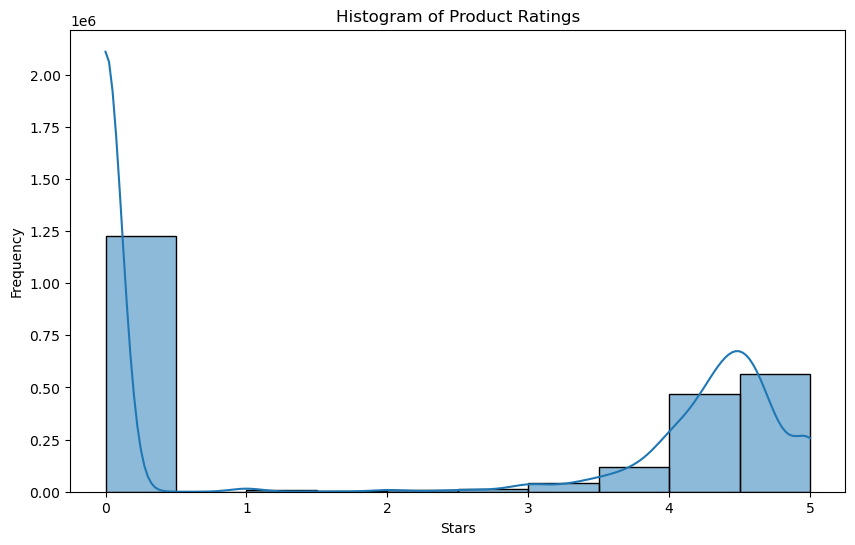

In [41]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(amazon_uk['stars'], bins=10, kde=True)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Histogram of Product Ratings')
plt.show()

 **Insights** from 'stars' Visualizations:

- The histogram indicates that the majority of the ratings are 0, suggesting that either customers are discontent with their purchases or they do not rate the items they buy.

- The next most frequent ratings are the top stars, primarily 4 and 4.5. This indicates a high level of customer satisfaction, suggesting that many buyers are genuinely happy with their purchases. Alternatively, it could imply that customers might feel compelled to leave positive ratings to receive a discount or reimbursement.

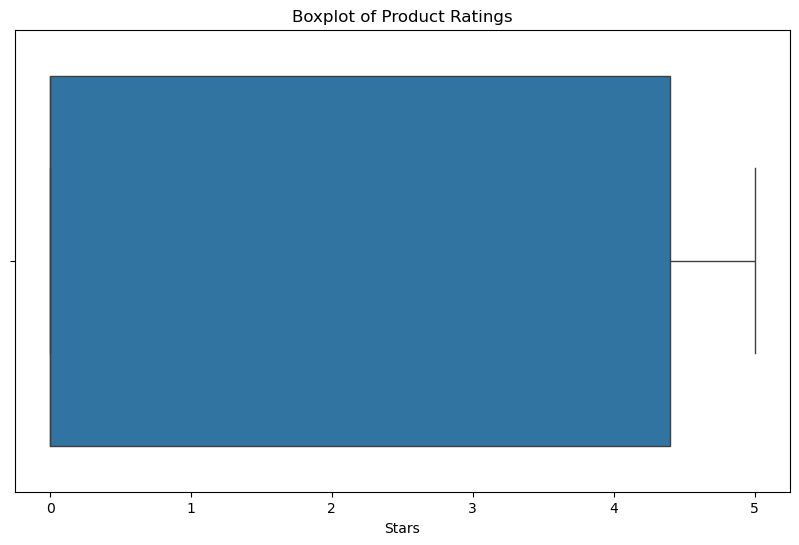

In [43]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=amazon_uk['stars'])
plt.xlabel('Stars')
plt.title('Boxplot of Product Ratings')
plt.show()

## Submission

Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.